### NOTEBOOK DESCRIPTION:

This notebook does the axis projection based on age and gender axis as well as a validation technique based on the generated axis

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


scriptpath = "/home/jouven/youtube_projects/"
sys.path.append(os.path.abspath(scriptpath))

from helpers.helpers_channels_more_300 import *
from helpers.helpers_channel_embedding import *
from helpers.helpers_visualization_axis_projection import *

### Selected parameters for the axis projection

In [2]:
# Number of neirest neighbors taken
k = 30

# Selected number of pairs to create the axis
nb_selected_pairs = 6

### Useful functions

In [3]:
PATH = '/dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/channel_sampling_then_combination/CONTEXT_True_100_SUBSAMPLING_FALSE_0.001_LR_0.005/models/embedding.csv.gz'

In [4]:
dict_channel_ind, dict_ind_channel, channels_id = filtered_channels_index_id_mapping()

## Finding cultural axis for our channel embedding

In [5]:
# Channels having more than 500'000 subscribers are selected to create the axis.
with open("/dlabdata1/youtube_large/jouven/channels_more_300/channels_more_150k_subs.pkl",'rb') as f:
     selected_channels_id = set(pickle.load(f))
f.close()

# Channels having more than 500'000 subscribers are selected to create the axis.
selected_channels = []
for channel in channels_id:
    selected_channels.append(dict_channel_ind[channel])

In [6]:
channelcrawler_projection = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
# Select the rows being in the select channels
channelcrawler_projection = channelcrawler_projection[channelcrawler_projection['channel'].apply(lambda row: row in selected_channels_id)]

In [7]:
channelcrawler_projection.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


### Gender axis: men vs women

In [8]:
# Here you will find everything about: Men's Fashion, Hairstyle, Fitness & Health, Personal Vlogs and Tech.
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Alex Costa']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
2519,Howto & Style,2011-09-29,UCZyCposXwcyopaACep44maQ,Alex Costa,2120000,543,5370.0,2.417


In [9]:
# vlog channel about make up, hair transformation, rings selections, ...
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Shaaanxo']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
1737,Howto & Style,2009-01-18,UCMpOz2KEfkSdd5JeIJh_fxw,Shaaanxo,3215340,1422,3566.0,2.278


In [10]:
gender_seed = (dict_channel_ind['UCMpOz2KEfkSdd5JeIJh_fxw'], dict_channel_ind['UCZyCposXwcyopaACep44maQ'])

gender_axis, df_gender_axis = compute_axis_vector_based_on_seed(PATH, k, gender_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)


In [11]:
df_gender_axis

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
427,Howto & Style,2010-12-03,UCGwPbAQdGA3_88WBuGtg9tw,grav3yardgirl,8560000,1536,725.0,2.0870
136,Entertainment,2008-09-17,UC4PooiX37Pld1T8J5SYT-SQ,Good Mythical Mornin...,15700000,2307,210.0,2.0870
32211,People & Blogs,2010-01-27,UCCVPSH-O0TJ-N2WcnFUnT3w,CandidMommy,163000,3135,106604.0,4.5670
1604,Education,2008-11-23,UC3w193M5tYPJqF0Hi-7U-2g,Dr. Eric Berg DC,3150000,2666,3266.0,2.2745
1329,Entertainment,2014-03-16,UCoziFm3M4sHDq1kkx0UwtRw,Glam&Gore;,3580000,222,2648.0,2.2120
317,People & Blogs,2014-05-05,UCBUVGPsJzc1U8SECMgBaMFw,BuzzFeed Multiplayer...,9860000,1802,517.0,2.0870
210,Entertainment,2006-01-16,UCoookXUzPciGrEZEXmh4Jjg,Sesame Street,9200000,2844,337.0,2.0870
1203,Entertainment,2006-06-02,UCz97F7dMxBNOfGYu3rx8aCw,Sony Pictures Entert...,3760000,3451,2363.0,2.1790
669,Entertainment,2006-06-15,UCVJK2AT3ea5RTXNRjX_kz8A,Tobuscus,6290000,515,1209.0,2.0870
524,Entertainment,2010-05-17,UCsn6cjffsvyOZCZxvGoJxGg,Corridor,6710000,181,915.0,2.0870


### Age axis: kids vs adult

In [12]:
# Animation for kids
channelcrawler_projection[channelcrawler_projection['name_cc'] == "Magpiepony"]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
8280,Film and Animation,2013-12-17,UCISF5OGuAtSLNF24TKTnXag,Magpiepony,736000,304,21120.0,2.9225


In [13]:
# Channel analysing the films
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Beyond The Trailer']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
7841,Entertainment,2008-11-03,UCAXR2zenCwvRIyQd9ydtfaA,Beyond The Trailer,853000,5064,19744.0,2.8635


In [14]:
age_seed = (dict_channel_ind['UCISF5OGuAtSLNF24TKTnXag'], dict_channel_ind['UCAXR2zenCwvRIyQd9ydtfaA'])

age_axis, df_output_age = compute_axis_vector_based_on_seed(PATH, k, age_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)

In [15]:
df_output_age

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
470,Entertainment,2015-09-17,UCXZpQgX1897wYDLtvzmgyIA,Facts Verse,7680000,2203,810.0,2.0870
557,News & Politics,2006-08-07,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,6640000,48869,978.0,2.0870
3320,Film and Animation,2012-09-25,UCyjTUNqX_vasRG4AAaM34jA,Animation Domination...,1899859,254,7366.0,2.5365
66,Entertainment,2007-01-25,UCaWd5_7JhbQBe4dknZhsHJg,WatchMojo.com,21284359,17081,114.0,2.0870
1619,Gaming,2014-06-16,UCZBY6V8Lxmwu8gGRBOyO11w,Kubz Scouts,3160000,1440,3303.0,2.2885
443,Film and Animation,2014-05-12,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,7890000,202,749.0,2.0870
5825,Gaming,2008-09-23,UCqg5FCR7NrpvlBWMXdt-5Vg,Escapist,1150000,5315,14019.0,2.8095
2815,Gaming,2009-01-17,UCRBkeMoYX02w-0qVIKNkruw,PeanutButterGamer,2020000,187,6106.0,2.4695
1727,Gaming,2006-04-06,UC0M0rxSz3IF0CsSour1iWmw,Cinemassacre,3110000,1489,3543.0,2.2825


## Validation of the created axis

In [16]:
EMBEDDING = get_dataframe_in_embedding_space(PATH)

In [17]:
# Channels having more than 500'000 subscribers are selected to create the axis.
with open("/dlabdata1/youtube_large/jouven/channels_more_300/channels_more_500k_subs.pkl",'rb') as f:
     selected_channels_id = set(pickle.load(f))
f.close()

selected_channels = []
for channel in selected_channels_id:
    selected_channels.append(dict_channel_ind[channel])

In [18]:
# Select the rows being in the select channels (english channels)
channelcrawler = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
channelcrawler = channelcrawler[channelcrawler['channel'].apply(lambda row: row in channels_id)]

In [19]:
dict_idx_name, dict_name_idx = channel_to_name(channelcrawler, dict_channel_ind)

#### 1. Projection of the gender axis

In [20]:
df_gender_projection = create_projection(EMBEDDING, gender_axis, dict_idx_name)

In [21]:
# Inverse the signs for color matiching ...
df_gender_projection['projection'] = -df_gender_projection['projection']

In [22]:
df_gender_projection.head()

,name,projection
0,Winded Voyage Sailin...,-2.390746
1,The Night Fury,1.378869
2,Red Bull Surfing,3.385288
3,Heidi Joubert,0.549062
4,MR JC,-0.428587


In [23]:
seed_gender_name = ('Alex Costa', 'Shaaanxo')

No handles with labels found to put in legend.


NameError: name 'save_path' is not defined

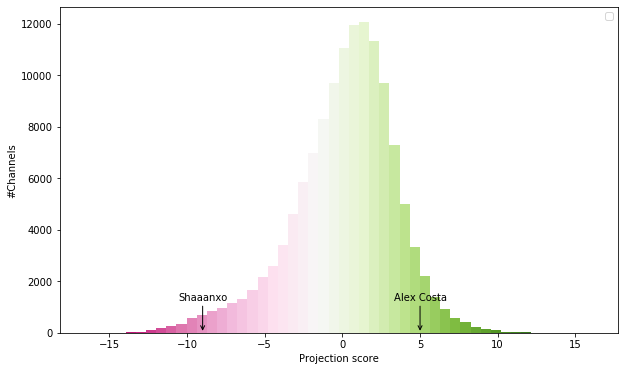

In [24]:
visualization(df_gender_projection, seed_gender_name, 'PiYG', 45, 'Distribution of the gender axis projection scores')

In [ ]:
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

df_left  = df_gender_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_gender_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the poles", (10, 6), cm)

In [ ]:
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_gender_projection['projection'].gt(-0.15)
df_left  = df_gender_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_gender_projection['projection'].gt(0.15)
df_right = df_gender_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the center", (2, 6), cm, 7)

In [ ]:
df_right = pd.DataFrame()
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'EminemMusic'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Kali Muscle'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Ninja'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'BluMaan'])

df_left = pd.DataFrame()
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Ariana Grande'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Kayla Itsines'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'LaurenzSide'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Liza Koshy'])

color = 'PiYG'
cm = plt.cm.get_cmap(color)

create_plot(df_left, df_right, 4, "Gender projection: Selected channels comparison", (4, 2.5), cm, 'exemples_gender_projection.pdf')


Select reknown girl or men like channels and validate if these channels are indeed correctly classified.
- first line: fashion channels
- second line: gaming channels
- third line: fitness channels
- fourth line: music channels

#### 2. Projection on the age axis

Channels having a negative projections score should correspond to adult channels, positive projections score should correspond to kids channels

In [ ]:
df_age_projection = create_projection(EMBEDDING, age_axis, dict_idx_name)
df_age_projection.head()

In [ ]:
age_seed_name = ("Magpiepony", 'Beyond The Trailer')
visualization(df_age_projection, age_seed_name, 'BrBG', 38, 'Distribution of the age axis projection score', 'distr_age.pdf')

In [ ]:
color = 'BrBG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

df_left  = df_age_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_age_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Age projection: Channels at the poles", (10, 10), cm)

In [ ]:
color = 'BrBG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_age_projection['projection'].gt(-0.3)
df_left  = df_age_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_age_projection['projection'].gt(0.3)
df_right = df_age_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channel at the center", (2, 6), cm, 1)

In [ ]:
df_age_projection[df_age_projection['name'] == "Blippi"]

In [ ]:
df_age_projection[df_age_projection['name'] == "Action Movie Kids"]

In [ ]:
df_left = pd.DataFrame()
df_left = df_left.append(df_age_projection[df_age_projection['name'] == 'Classical Tunes'])
df_left = df_left.append(df_age_projection[df_age_projection['name'] == 'James Bond 007'])
df_left = df_left.append(df_age_projection[df_age_projection['name'] == 'Call of Duty'])

df_right = pd.DataFrame()
df_right = df_right.append(df_age_projection[df_age_projection['name'] == 'Kids TV - Nursery Rh...'])
df_right = df_right.append(df_age_projection[df_age_projection['name'] == 'My Little Pony Offic...'])
df_right = df_right.append(df_age_projection[df_age_projection['name'] == 'Kids Games Tv'])

color = 'PiYG'
cm = plt.cm.get_cmap(color)

create_plot(df_left, df_right, 3, "Age projection: Selected channels comparison", (3, 2), cm, 'exemples_age_projection.pdf')
